#Author: Mahmod Kirresh



# Capacitor Real-World Discharge Behaviour Data-Analysis

#Step 1: Import the libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


 # Step 2: Upload the CSV file and read it

In [51]:
# Load the original dataset (with LED distortion)
df = pd.read_csv('capacitor_discharge_data1.csv')
df.columns = ['Time', 'Voltage']

#Step 3: Plot raw voltage data

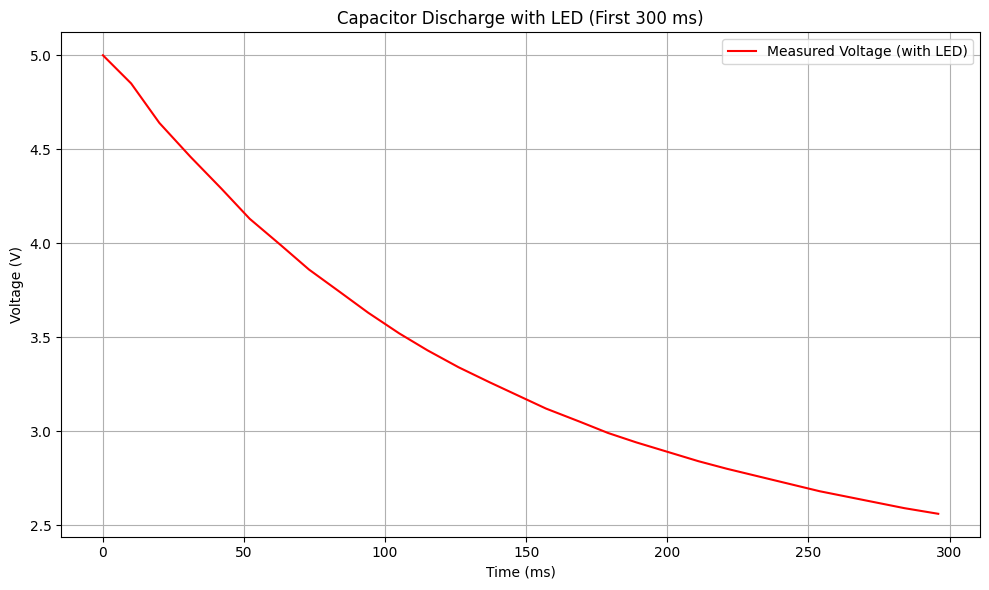

In [52]:
# Filter the data to only include the first 300 milliseconds
df_led = df[df['Time'] <= 300]

# Plot the trimmed LED-affected data
plt.figure(figsize=(10, 6))  # 10 inches wide, 6 inches tall
plt.plot(df_led['Time'], df_led['Voltage'], label='Measured Voltage (with LED)', color='red')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Capacitor Discharge with LED (First 300 ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#We can observe an exponential-like decay, but it diverges significantly from theoretical expectations as you will see down below.

#Step 4: Compare to theoretical Curve

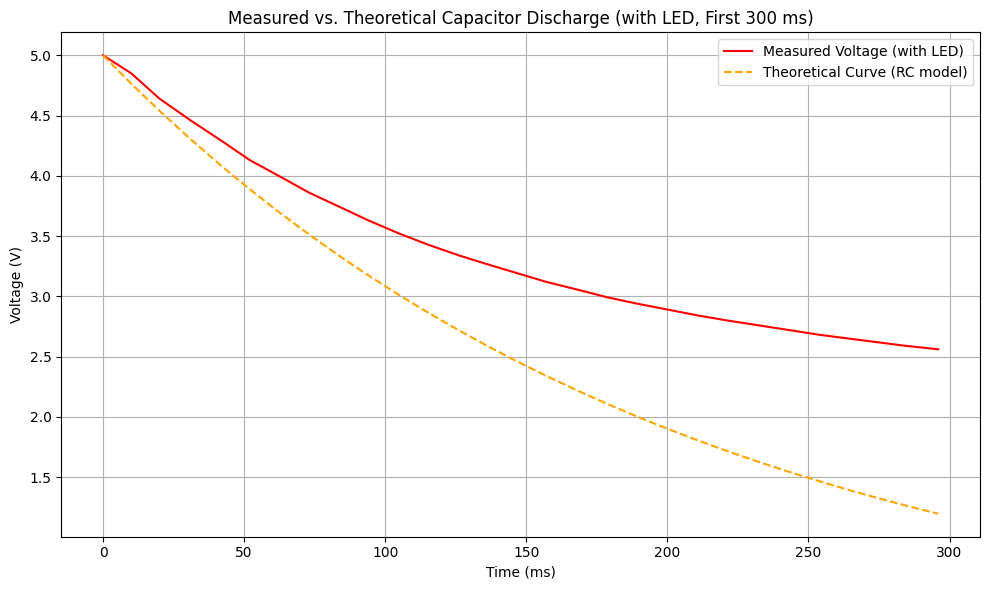

In [53]:
# Filter to first 300 ms
df = df[df['Time'] <= 300]

# Theoretical parameters
R = 220            # Resistance in ohms
C = 470e-6         # Capacitance in farads
tau_theoretical = R * C  # Time constant in seconds

# Use initial voltage from data
V0 = df['Voltage'].iloc[0]

# Generate theoretical curve using same time values
time_s = df['Time'] / 1000  # Convert ms to seconds
voltage_theoretical = V0 * np.exp(-time_s / tau_theoretical)

# Plot measured vs. theoretical
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Voltage'], label='Measured Voltage (with LED)', color='red')
plt.plot(df['Time'], voltage_theoretical, label='Theoretical Curve (RC model)', linestyle='--', color='orange')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Measured vs. Theoretical Capacitor Discharge (with LED, First 300 ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# The measured voltage diverges from the expected RC decay. This mismatch was later traced back to the LED clamping the voltage and interfering with the discharge path.

#Step 5: Lets now see the Graph when the LED is removed, and compare it to the theoretical curve.


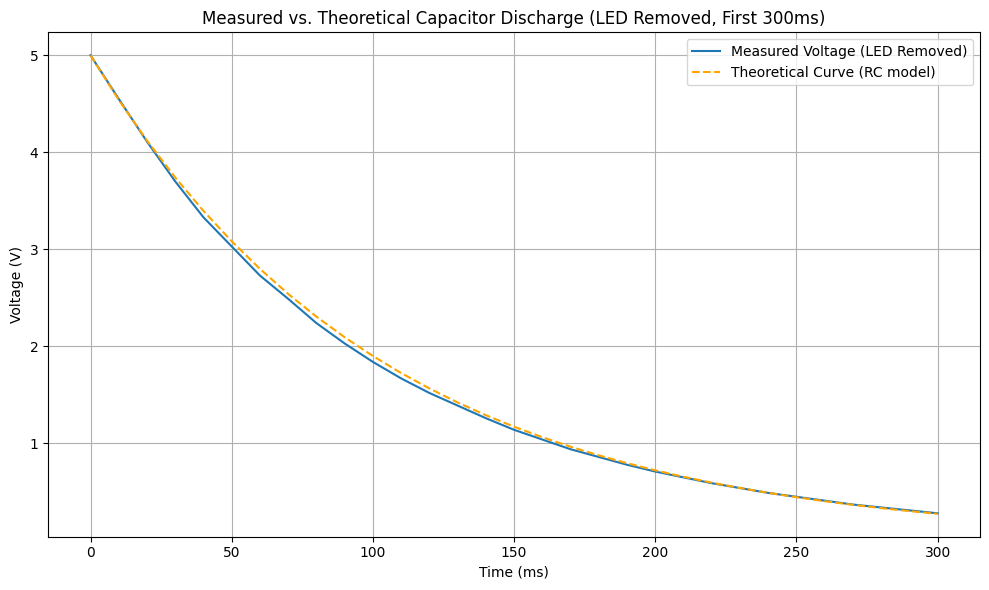

In [54]:
# Load the corrected dataset (LED removed)
df2 = pd.read_csv('capacitor_discharge_data2.csv.csv')
df2.columns = ['Time', 'Voltage']

# Theoretical RC values
R = 220   # Ohms
C = 470e-6   # Farads
tau_theoretical = R * C  # Time constant in seconds

# Use initial voltage from the corrected dataset
V0 = df2['Voltage'].iloc[0]

# Convert time to seconds for theoretical model
time_s2 = df2['Time'] / 1000

# Compute theoretical voltage
voltage_theoretical2 = V0 * np.exp(-time_s2 / tau_theoretical)

# Plot measured vs. theoretical
plt.figure(figsize=(10, 6))
plt.plot(df2['Time'], df2['Voltage'], label='Measured Voltage (LED Removed)', color='tab:blue')
plt.plot(df2['Time'], voltage_theoretical2, label='Theoretical Curve (RC model)', linestyle='--', color='orange')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('Measured vs. Theoretical Capacitor Discharge (LED Removed, First 300ms)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



#The measured discharge curve, obtained after removing the LED, follows the theoretical RC exponential model with a near-perfect match. This alignment confirms the time constant derived from τ = RC without requiring additional curve fitting.

#This confirms the importance of isolating passive components during validation and shows that even a simple LED can significantly alter discharge behavior

#**Concluison:** This experiment demonstrated the real-world discharge behavior of a capacitor and how external components can significantly affect circuit dynamics. In the first setup, an LED was placed in the discharge path, which distorted the expected RC behavior by clamping the voltage and interfering with the exponential decay. The measured voltage failed to align with the theoretical RC model.

#After removing the LED and isolating the capacitor-resistor system, the measured discharge curve aligned almost perfectly with the theoretical equation:
#V(t)=V 0⋅e −t/τ
#Using 220ohms and C = 470𝜇𝐹



# The theoretical time constant τ ≈ 103 ms matched the observed data with high accuracy. The experiment confirmed that even small changes in circuit configuration  (like adding an LED) can significantly alter results.



#This highlights not only the accuracy of the RC model in practice, but also the importance of careful component selection and circuit isolation when validating physical models. The outcome reinforces how hands-on prototyping can deepen theoretical understanding, even in seemingly simple systems.